# **1. Data Cleaning and Preparation**

## **Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

## **Importing Data**

In [ ]:
file_url      = 'https://docs.google.com/spreadsheets/d/1p9AZfOFr_Q_HoE-mls5Ac3FvW5fyw-r2/edit#gid=652233981'
file_url_trf  = file_url.replace('/edit#gid=', '/export?format=csv&gid=')
df           = pd.read_csv(file_url_trf)
df['Province'].value_counts()

JAWA TIMUR                   1748
JAWA BARAT                    807
DKI JAKARTA                   774
SULAWESI SELATAN              767
JAWA TENGAH                   602
SUMATERA UTARA                506
BANTEN                        478
RIAU                          168
SUMATERA SELATAN              164
KEPULAUAN RIAU                138
LAMPUNG                       123
KALIMANTAN BARAT               85
KALIMANTAN TIMUR               78
BALI                           76
NUSA TENGGARA BARAT            75
SULAWESI TENGGARA              52
JAMBI                          50
ACEH                           37
DI YOGYAKARTA                  37
KALIMANTAN SELATAN             34
SUMATERA BARAT                 34
SULAWESI UTARA                 21
PAPUA                          17
KEPULAUAN BANGKA BELITUNG      16
SULAWESI TENGAH                16
SULAWESI BARAT                 12
BENGKULU                        7
PAPUA BARAT                     6
NANGGROE ACEH DARUSSALAM        5
GORONTALO     

In [ ]:
sheet_url_2= 'https://docs.google.com/spreadsheets/d/1p9AZfOFr_Q_HoE-mls5Ac3FvW5fyw-r2/edit#gid=652233981'
sheet_url_trf_2 = sheet_url_2.replace('/edit#gid=', '/export?format=csv&gid=')
df_transaction_users = pd.read_csv(sheet_url_trf_2)
df_transaction_users

,Mom Name,FK_MEMBER_ID,JoinDate,TransDate,Province,Grammage,Qty
0,AZIZAH,506998,2019-12-23 16:40:37.950,2020-01-01 18:23:00.000,JAWA TIMUR,400 GR,1.0
1,LINDA,426512,2019-07-17 07:46:51.000,2020-01-01 10:34:00.000,JAWA TIMUR,900 GR,1.0
2,SRI WILARNI,505072,2019-12-18 12:16:48.997,2020-01-01 20:28:00.000,BANTEN,900 GR,1.0
3,EVA SUSANTI,261509,2017-09-30 11:21:11.000,2020-01-01 19:31:00.000,SULAWESI TENGGARA,700 GR,1.0
4,RINI,489062,2019-11-08 10:47:47.000,2020-01-01 18:08:00.000,JAWA BARAT,1400 GR,2.0
...,...,...,...,...,...,...,...
6940,HIRMAN,497340,2019-11-27 12:27:35.517,2020-03-02 19:59:00.000,JAWA TIMUR,1400 GR,2.0
6941,AZWAR,385477,2019-03-19 12:01:48.197,2020-03-02 15:12:00.000,SUMATERA UTARA,700 GR,1.0
6942,NUNG,289736,2018-04-23 12:26:44.767,2020-03-01 12:23:00.000,JAWA BARAT,700 GR,3.0
6943,LIKAH,534324,2020-03-04 08:48:56.290,2020-03-01 19:36:00.000,JAWA TIMUR,400 GR,1.0


In [ ]:
sub_df = df_transaction_users[['FK_MEMBER_ID','JoinDate']]
sub_df.drop_duplicates(inplace = True)

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6945 entries, 0 to 6944
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Mom Name      6945 non-null   object 
 1   FK_MEMBER_ID  6945 non-null   int64  
 2   JoinDate      6945 non-null   object 
 3   TransDate     6945 non-null   object 
 4   Province      6945 non-null   object 
 5   Grammage      6945 non-null   object 
 6   Qty           6945 non-null   float64
dtypes: float64(1), int64(1), object(5)
memory usage: 379.9+ KB


## **Converting Datatypes**

In [ ]:
#converting transaction_date and transaction_time to datetime type

for col in ['TransDate','JoinDate']:
  print(col)
  df[col] = pd.to_datetime(df[col])

df.info()

TransDate
JoinDate
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6945 entries, 0 to 6944
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Mom Name      6945 non-null   object        
 1   FK_MEMBER_ID  6945 non-null   int64         
 2   JoinDate      6945 non-null   datetime64[ns]
 3   TransDate     6945 non-null   datetime64[ns]
 4   Province      6945 non-null   object        
 5   Grammage      6945 non-null   object        
 6   Qty           6945 non-null   float64       
dtypes: datetime64[ns](2), float64(1), int64(1), object(3)
memory usage: 379.9+ KB


In [ ]:
df_final = df.merge(sub_df, on = 'FK_MEMBER_ID', how = 'inner')
df_final = df_final.drop(['JoinDate_x'], axis = 1)
df_final['Max_Transaction'] = df_final['TransDate'].max()
df_final['Max_Transaction'] = df_final['Max_Transaction'].apply(lambda x: pd.Timestamp(x).strftime('%Y-%m-%d'))
df_final['Max_Transaction'] = pd.to_datetime(df_final['Max_Transaction'])
df_final['JoinDate'] = pd.to_datetime(df_final['JoinDate_y'])
df_final['User_Age'] = round(((df_final['Max_Transaction'] - df_final['JoinDate']).dt.days)/30)
df_final['Order_id'] =list(df.index +1)
df_final[['Gramm_value','Grammage_2']] =df_final['Grammage'].str.split(' ', 1, expand=True)
df_final['Gramm_total'] =pd.to_numeric(df_final['Gramm_value'])*df_final['Qty']
df_final = df_final.drop(['JoinDate_y','Grammage_2'], axis = 1)
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6945 entries, 0 to 6944
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Mom Name         6945 non-null   object        
 1   FK_MEMBER_ID     6945 non-null   int64         
 2   TransDate        6945 non-null   datetime64[ns]
 3   Province         6945 non-null   object        
 4   Grammage         6945 non-null   object        
 5   Qty              6945 non-null   float64       
 6   Max_Transaction  6945 non-null   datetime64[ns]
 7   JoinDate         6945 non-null   datetime64[ns]
 8   User_Age         6945 non-null   float64       
 9   Order_id         6945 non-null   int64         
 10  Gramm_value      6945 non-null   object        
 11  Gramm_total      6945 non-null   float64       
dtypes: datetime64[ns](3), float64(3), int64(2), object(4)
memory usage: 705.4+ KB


# **2. Customer Segmentation**

In [ ]:
df_clust = df_final.copy()

## **a. RFM and Customer Attributes**

In [ ]:
# Convert to show date only
df_clust["TransDate"] = pd.to_datetime(df_clust["TransDate"]).dt.date

# Create date variable that records recency
import datetime
snapshot_date = max(df_clust.TransDate) + datetime.timedelta(days=1)

# Aggregate data by each customer
customers = df_clust.groupby('FK_MEMBER_ID').agg(
            Recency               = ('TransDate', lambda x: (snapshot_date - x.max()).days),
            Frequency             = ('Order_id', 'nunique'),
            Monetary_gr       = ('Gramm_total', 'sum'),
            Province              = ('Province', lambda x:x.value_counts().index[0]),
            CustomerAge           = ('User_Age', lambda x:x.value_counts().index[0])
)

In [ ]:
customers

,Recency,Frequency,Monetary_gr,Province,CustomerAge
FK_MEMBER_ID,,,,,
169405,3,2,3200.0,JAWA TIMUR,57.0
169530,33,2,15600.0,SULAWESI SELATAN,64.0
169614,33,1,700.0,SULAWESI SELATAN,45.0
169778,33,1,3600.0,SULAWESI SELATAN,40.0
169903,2,2,4200.0,SULAWESI SELATAN,40.0
...,...,...,...,...,...
564028,32,1,700.0,JAWA BARAT,-7.0
595535,31,1,400.0,DKI JAKARTA,-11.0
606969,63,1,3200.0,NUSA TENGGARA BARAT,-13.0


## **b. Feature Encoding**

In [ ]:
customers.select_dtypes(exclude=['number']).columns

Index(['Province'], dtype='object')

In [ ]:
customers.select_dtypes(include=['number']).columns

Index(['Recency', 'Frequency', 'Monetary_gr', 'CustomerAge'], dtype='object')

In [ ]:
customers_std = customers.copy()

In [ ]:
# One-hot Encoding
# Categorical variables --> dummies

def onehot_encode(data, column):
    dummies = pd.get_dummies(data[column], prefix=column)
    data = pd.concat([data, dummies], axis=1)
    data = data.drop(column, axis=1)
    return data

for column in ['Province']:
        customers_std = onehot_encode(customers_std, column=column)

## **c. Standardization**

In [ ]:
from sklearn.preprocessing import StandardScaler

std_columns = ['Recency', 'Frequency', 'Monetary_gr']

for i in std_columns:
    customers_std[i] = StandardScaler().fit_transform(customers_std[i].values.reshape(len(customers_std),1))

In [ ]:
customers_std = customers_std[['Recency','Frequency','Monetary_gr']]
customers_std

,Recency,Frequency,Monetary_gr
FK_MEMBER_ID,,,
169405,-1.090109,1.258264,0.526192
169530,0.177773,1.258264,6.128523
169614,0.177773,-0.440994,-0.603311
169778,0.177773,-0.440994,0.706912
169903,-1.132371,1.258264,0.977993
...,...,...,...
564028,0.135511,-0.440994,-0.603311
595535,0.093248,-0.440994,-0.738851
606969,1.445655,-0.440994,0.526192


## **d. Determine Cluster Number Method**

### **1. Dendogram**

In [ ]:
from sklearn.cluster import AgglomerativeClustering # For HAC clustering
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch # For HAC Denddrogram

In [ ]:
# Select attributes
X = customers_std

# Create a figure
plt.figure(figsize=(10,5), dpi=300)

# Create linkage
Z = sch.linkage(X, method='ward', optimal_ordering=True)

# Draw a dendrogram
sch.dendrogram(Z, leaf_rotation=90, leaf_font_size=10,
               color_threshold=23, above_threshold_color='black')

# Add horizontal line
plt.axhline(y=23, c='grey', lw=1, linestyle='dashed')

# Show the plot
plt.show()

### **2. Elbow Method**

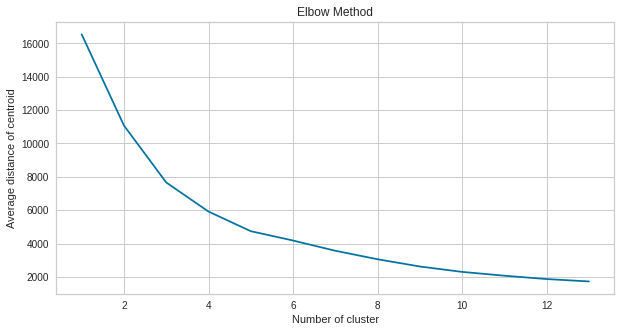

In [ ]:
from sklearn.cluster import KMeans

sse={}
df_cluster = customers_std[['Recency','Frequency','Monetary_gr']]
for k in range(1, 14):
    kmeans = KMeans(n_clusters=k, max_iter=2000).fit(df_cluster)
    df_cluster["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_

plt.figure(figsize=(10, 5))
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Average distance of centroid")
plt.title("Elbow Method")
plt.show()

### **3. Silhouette Analysis**

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
def silhoutte_analysis(data,cluster=[2,3,4]):
    X = data.to_numpy()

    range_n_clusters = cluster

    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print(
            "For n_clusters =",
            n_clusters,
            "The average silhouette_score is :",
            silhouette_avg,
        )

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                ith_cluster_silhouette_values,
                facecolor=color,
                edgecolor=color,
                alpha=0.7,
            )

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(
            X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
        )

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(
            centers[:, 0],
            centers[:, 1],
            marker="o",
            c="white",
            alpha=1,
            s=200,
            edgecolor="k",
        )

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(
            "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
            % n_clusters,
            fontsize=14,
            fontweight="bold",
        )

    plt.show()

For n_clusters = 2 The average silhouette_score is : 0.47684177543370565
For n_clusters = 3 The average silhouette_score is : 0.484298577742331
For n_clusters = 4 The average silhouette_score is : 0.5016714259215435


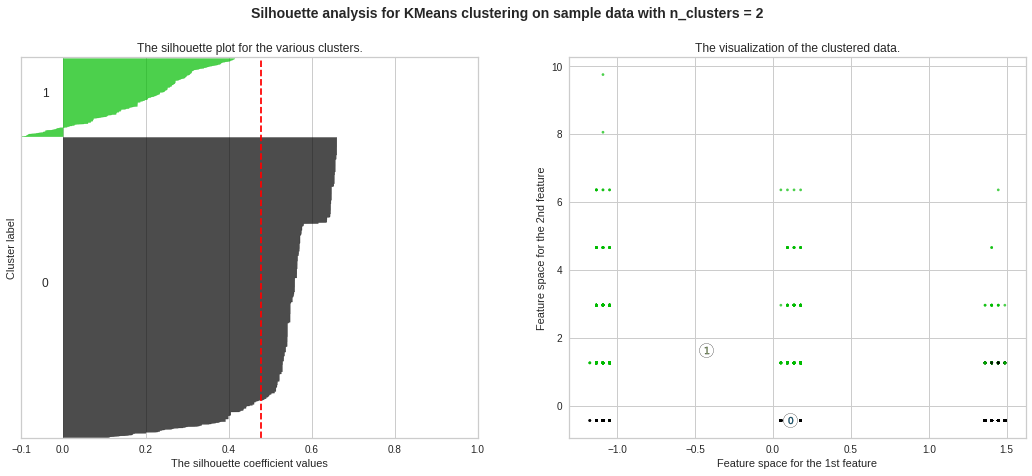

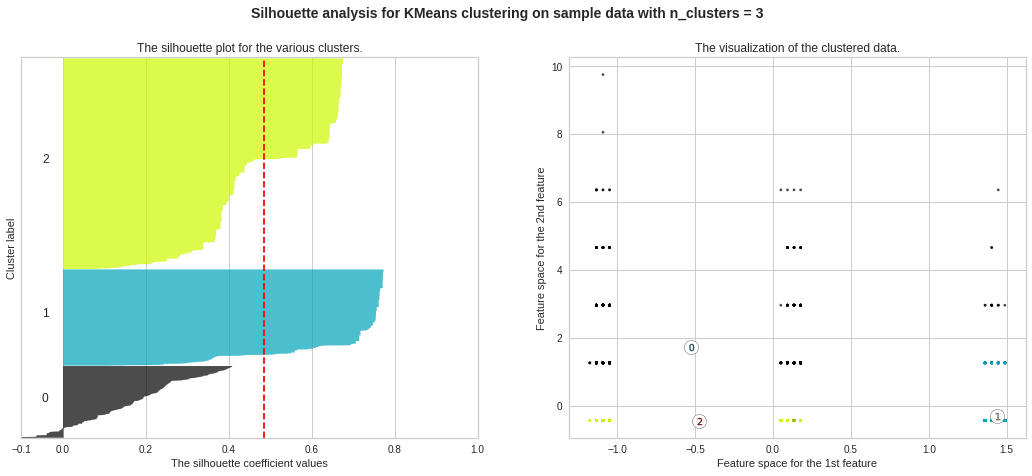

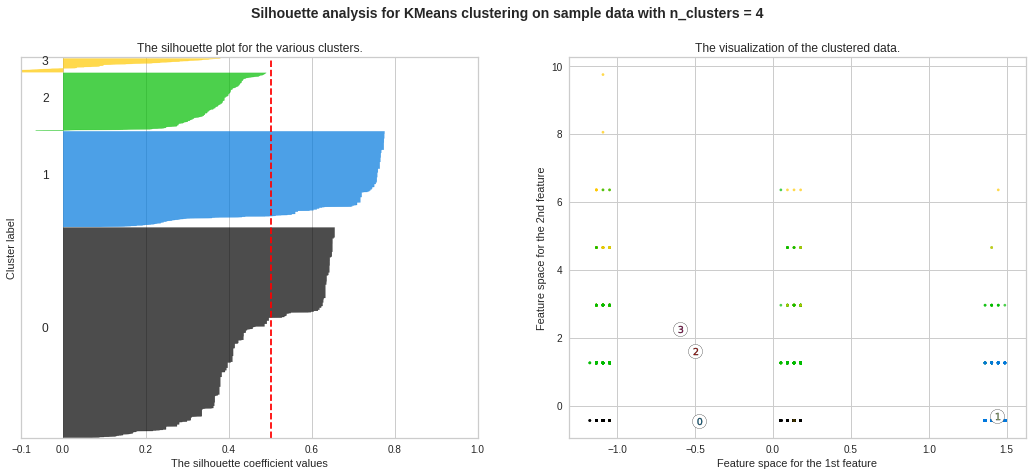

In [ ]:
# from silhoutte import silhoutte_analysis
silhoutte_analysis(customers_std,list(range(2,5)))

## **e. K-Means Clustering**

In [ ]:
X = customers_std
model = KMeans(n_clusters=4)
clust = model.fit(X)

In [ ]:
customers_std['clusters'] = clust.labels_
customers['clusters']     = clust.labels_

In [ ]:
customers.head()

,Recency,Frequency,Monetary_gr,Province,CustomerAge,clusters
FK_MEMBER_ID,,,,,,
169405,3,2,3200.0,JAWA TIMUR,57.0,2
169530,33,2,15600.0,SULAWESI SELATAN,64.0,3
169614,33,1,700.0,SULAWESI SELATAN,45.0,1
169778,33,1,3600.0,SULAWESI SELATAN,40.0,1
169903,2,2,4200.0,SULAWESI SELATAN,40.0,2


In [ ]:
from google.colab import files

In [ ]:
customers.to_csv("Customers.csv", index = False)

In [ ]:
customers.to_csv('Customers.csv')

In [ ]:
files.download('Customers.csv')

## **f. Segment Interpretation**

### **1. RFM**

In [ ]:
customers.groupby(['clusters'])['Recency','Frequency','Monetary_gr'].agg(['mean','count'])

<ipython-input-39-a6769e444fa7>:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



Recency       Frequency        Monetary_gr      
               mean count      mean count         mean count
clusters                                                    
0         62.837393  1396  1.070201  1396  1505.945559  1396
1         17.510583  3071  1.000000  3071  1539.270596  3071
2         16.658323   799  2.195244   799  2650.312891   799
3         15.975806   248  2.524194   248  9177.016129   248

### **2. Frequently Purchased Product**

In [ ]:
customers.groupby(['clusters','Frequency'])['clusters'].agg(['count'])

count
clusters Frequency       
0        1           1298
         2             98
1        1           3071
2        2            663
         3            119
         4             14
         5              3
3        1             37
         2            104
         3             62
         4             33
         5             10
         6              1
         7              1

### **3. Customer Apps Age**

In [ ]:
customers.groupby(['clusters'])['CustomerAge'].agg(['mean','count'])

,mean,count
clusters,,
0,14.059456,1396
1,12.058287,3071
2,14.560701,799
3,19.375000,248


### **4. Most Consumable Formula**

In [ ]:
customers.groupby(['clusters'])['Monetary_gr'].agg(['mean','count'])

,mean,count
clusters,,
0,1505.945559,1396
1,1539.270596,3071
2,2650.312891,799
3,9177.016129,248


### **5. Province**

In [ ]:
customers.groupby(['clusters','Province'])['clusters'].agg(['count'])

count
clusters Province                
0        ACEH                  10
         BALI                  25
         BANTEN               100
         DI YOGYAKARTA         15
         DKI JAKARTA          158
...                           ...
3        SULAWESI SELATAN      43
         SULAWESI TENGAH        1
         SULAWESI TENGGARA      1
         SUMATERA SELATAN      13
         SUMATERA UTARA        12

[115 rows x 1 columns]

### **7. Cluster Visualization**

In [ ]:
import plotly.express as px
from plotly.offline import iplot

# Create the dataframe
df_normalized = customers_std[['Recency', 'Frequency', 'Monetary_gr']]
df_normalized['ID'] = customers.index
df_normalized['Cluster'] = clust.labels_

# Melt The Data
df_nor_melt = pd.melt(df_normalized.reset_index(),
                      id_vars=['ID', 'Cluster'],
                      value_vars=['Recency','Frequency','Monetary_gr'],
                      var_name='Attribute',
                      value_name='Value')
df_nor_melt.head()

fig = px.scatter_3d(df_normalized, x='Recency',
                   y='Frequency', z='Monetary_gr',
                   color='Cluster')
iplot(fig)

# **3. Summary**

-  **cluster 0: Casual Mom**
    - Recency High,63 Days Since Last Purchase
    - Frequency Low  = 1 Time Purchased
    - Monetary Low  Consumable average = 1505.94 Gr
    - Count of Clusters = 1399

-  **cluster 1: Silver member Mom**
    - Recency Medium, 17.5 Days Since Last Purchase
    - Frequency Low  = 1 Time Purchased
    - Monetary Low  Consumable average = 1539.27 Gr
    - Count of Clusters = 3071 >> most of consumer comes from this

-  **cluster 2: Gold Member Mom**
    - Recency Medium, 17 Days Since Last Purchase
    - Frequency Medium  = 2.19 Time Purchased
    - Monetary Medium  Consumable average = 2650.31 Gr
    - Count of Clusters = 799

-  **cluster 3: Platinum Member Mom**
    - Recency Medium, 16 Days Since Last Purchase
    - Frequency High  = 2.52 Time Purchased
    - Monetary High  Consumable average = 9177 Gr
    - Count of Clusters = 248